#**1. Importing  necessary Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

#**2. Loading the Dataset**

In [ ]:
data = pd.read_csv("House Price Prediction Dataset.csv")
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


#**3. Selecting required Features/Variables**

In [ ]:
features = ["Bedrooms", "Bathrooms", "Area"]
target = "Price"

#**4. Data cleaning and Preprocessing**


In [ ]:
#Checking and removing null entries
print(data[features+[target]].isnull().sum())
data=data.dropna(subset=features+[target])

Bedrooms     0
Bathrooms    0
Area         0
Price        0
dtype: int64


In [ ]:
data = data[data["Price"] < data["Price"].quantile(0.99)] # Remove top 1% high prices
data = data[data["Area"] < data["Area"].quantile(0.99)] # Remove very large houses

#Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(data[["Bedrooms", "Bathrooms", "Area"]])

#**5. Model Training and Prediction**

In [ ]:
#Train-Test split
X = data[features]
Y=data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #random_state can be any integer. Its job is to make the random split reproducible.

In [ ]:
#Model Training
model = LinearRegression()
model.fit(X_train, Y_train)

#Prediction
Y_pred = model.predict(X_test)

#**6. Model Evaluation**

In [ ]:
print("R² Score = ",r2_score(Y_test, Y_pred))
print("Root Mean Squared Error = ",mean_squared_error(Y_test, Y_pred))

R² Score =  0.00025253107295131194
Root Mean Squared Error =  73180251136.58295


#**7. Visualization**

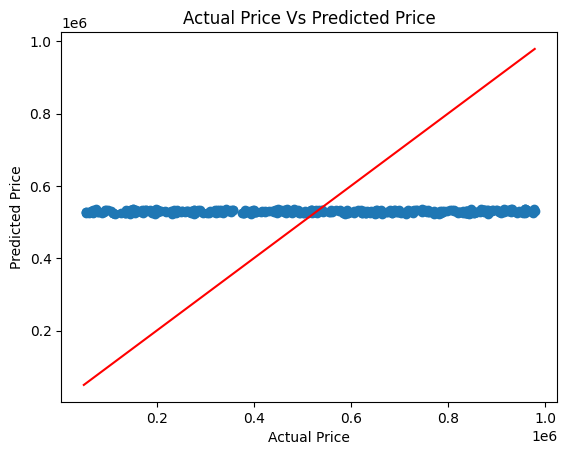

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color="red")
plt.show()

#**8. For Deploying the Model through Streamlit**

In [ ]:
# Save the trained Linear Regression model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
from google.colab import files
files.download('model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Streamlit Web App code
code = '''
import streamlit as st
import pickle
import numpy as np

# Load model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title("House Price Prediction")
st.write("Predict house prices based on Bedrooms, Bathrooms, and Area.")

bedrooms = st.number_input("Number of Bedrooms", min_value=0, value=3)
bathrooms = st.number_input("Number of Bathrooms", min_value=0, value=2)
area = st.number_input("Area (in sqft)", min_value=0, value=1000)

if st.button("Predict"):
    input_data = np.array([[bedrooms, bathrooms, area]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    st.success(f"Predicted Price: ₹{int(prediction[0])}")
'''

# Save as .py file
with open('app.py', 'w') as file:
    file.write(code)

# Download the .py file
from google.colab import files
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>